# Plots for Gen2 call

### Dec 18, 2020

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
import pyrex.custom.ara as ara


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


## Integrate noise

In [4]:
wform = pd.read_pickle("../ARA_analysis/CenA_sourceSearch/Stokes/Traces.pkl")
wform.tail()

,time,traceH,traceV
1275,198.4375,36.293780,-24.876276
1276,198.7500,67.280380,22.046611
1277,199.0625,36.860234,24.829893
1278,199.3750,22.753557,-50.166415
1279,199.6875,57.495126,-103.286321


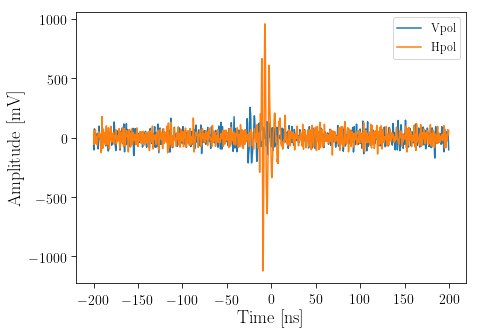

In [13]:
plt.figure(figsize=(7,5))
plt.plot(wform.time, wform.traceV, label="Vpol")
plt.plot(wform.time, wform.traceH, label="Hpol")

plt.xlabel("Time [ns]")
plt.ylabel("Amplitude [mV]")
plt.legend()

In [85]:
def findHighestPeakBin(values):
    if abs(max(values))>=abs(min(values)):
        peakBin = np.argmax(values)
    else:
        peakBin = np.argmin(values)
    return peakBin

In [28]:
20/(wform.time[1]-wform.time[0])#Number of bins in 20 ns

64.0

In [29]:
60/(wform.time[1]-wform.time[0])#Number of bins in 60 ns

192.0

In [76]:
def integratePowerWindow(times, values):
    times = np.array(times)
    values = np.array(values)
    dT = times[1]-times[0]
    leftNumBins = int(20/dT)#Number of bins in 20 ns
    rightNumBins = int(60/dT)#Number of bins in 60 ns

    peakBin = findHighestPeakBin(values)#Find bin where peak happens
    lowerEdgeBin = peakBin-leftNumBins
    upperEdgeBin = peakBin+rightNumBins
    if((lowerEdgeBin<0) or (upperEdgeBin<0)):
        return -1
    cutWform = values[lowerEdgeBin:upperEdgeBin]
    cutTimes = times[lowerEdgeBin:upperEdgeBin]
    power = np.sum(cutWform**2)*dT
    return power

In [77]:
def integratePowerNoise(times, values):
    times = np.array(times)
    values = np.array(values)
    dT = times[1]-times[0]
    #need to integrate first 80 ns of the waveform
    numBins = int(80/dT)
    cutWform = values[0:numBins]
    power = np.sum(cutWform**2)*dT
    return power

In [78]:
integratePowerNoise(wform.time, wform.traceV)

207484.48491134396

### Test functions

In [72]:
theta = np.radians(150.94)
phi = np.radians(319.28)
decT_V, decV_V= util.deConvolve_antenna(wform.time, wform.traceV, theta, phi, 0)
decT_H, decV_H= util.deConvolve_antenna(wform.time, wform.traceH, theta, phi, 1)

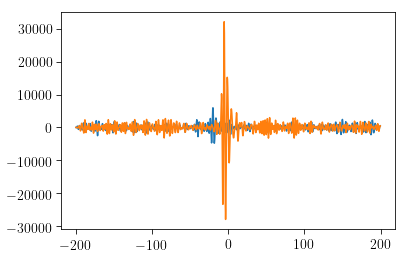

In [74]:
plt.plot(decT_V, decV_V)
plt.plot(decT_H, decV_H)

In [82]:
powerV = integratePowerWindow(decT_V, decV_V)
powerV_noise = integratePowerNoise(decT_V, decV_V)

powerH = integratePowerWindow(decT_H, decV_H)
powerH_noise = integratePowerNoise(decT_H, decV_H)

newPowerV = powerV - powerV_noise
newPowerH = powerH - powerH_noise

In [83]:
util.PolVectorRecoPower(newPowerV,newPowerH,theta,phi)


array([-0.52504305, -0.84673742,  0.08582267])

In [84]:
np.degrees(np.arccos(0.08582267))

85.07666673457555